In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")
# Review the DataFrame
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [7]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [8]:
# no imputation
# no encoding
# we need a scaler 

In [9]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [10]:
# imbalance

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [12]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [13]:
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [14]:
# SCALE the NUMERIC Features FIRST

# subset
df_sub = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [16]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df_scaled

In [17]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [18]:
# Review the X variable DataFrame
print(X)

       loan_size  interest_rate  borrower_income  debt_to_income  \
0       0.427304       0.426837         0.427404        0.668571   
1      -0.671487      -0.674918        -0.671552       -0.802166   
2      -0.384846      -0.370249        -0.372922       -0.344424   
3       0.427304       0.417844         0.415459        0.655346   
4       0.475078       0.456068         0.451295        0.694873   
...          ...            ...              ...             ...   
77531   4.440280       4.461737         4.464873        3.388970   
77532   3.771451       3.788317         3.783998        3.089553   
77533   3.723677       3.712992         3.712327        3.055563   
77534   3.102622       3.120518         3.115069        2.751245   
77535   2.768207       2.754015         2.756713        2.548451   

       num_of_accounts  derogatory_marks  total_debt  
0             0.616143          1.043996    0.427404  
1            -0.434049         -0.673973   -0.671552  
2            -0.43

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [19]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages

---

In [20]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

TRAIN METRICS
    Confusion Matrix: 
    [[55957   320]
 [   33  1842]]
    
    AUC: 0.9943324010400933

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [   12   613]]
    
    AUC: 0.9965558931712777

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    


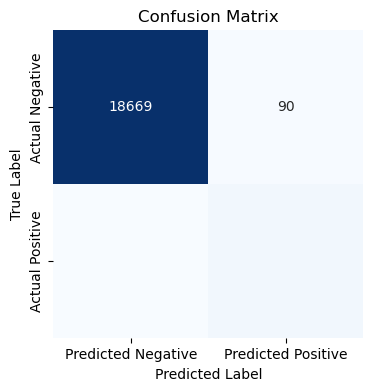

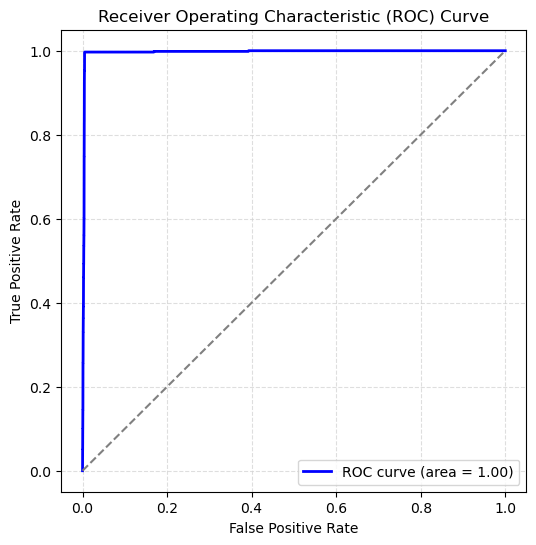

In [21]:
 # Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using training data
# YOUR CODE HERE!

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [12]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Logistic regression model prediction is very good. If one looks at the precision, recall and f1 score corresponding to labels 0 and 1 it can be seen that the results are in agreement with tain and tested data. This implies linear relationships with target. Below is more analysis from our class. 



In [32]:
# below are the notes from Prof for my reference
# We have severe imbalance, which I thought would affect model performance
# Low sample size of the positive loan_status class

# Logistic Regression Looks really good.. This implies linear relationships with the target
# Could experiment with different regularization strategies

# SVC model is really good - again this is likely because of the linear relationships. Complex Math Model
# KNN model is also really good - makes sense - similar people are likely to default together

# RandomForest/ExtraTrees/DecisionTree - they all seem to be finding patterns in the non-default class, and missing patterns in the positive class
# Likely due to small sample
# Trees are very dependent on sample size

# Ada looks good (doesn't over fit)

# Boosted Trees also look really good, so they seem to have minimize the non-default class patterns when predicting positive class

# SVC/KNN/AdaBoost/XGBoost/LightGBM were all good

# KNN is most explainable...

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18683    76]
 [  123   502]]
    
    AUC: 0.9366155552001707

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.80      0.83       625

    accuracy                           0.99     19384
   macro avg       0.93      0.90      0.91     19384
weighted avg       0.99      0.99      0.99     19384

    


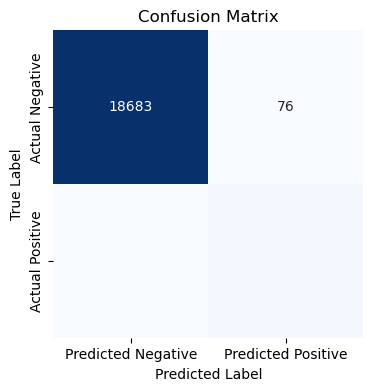

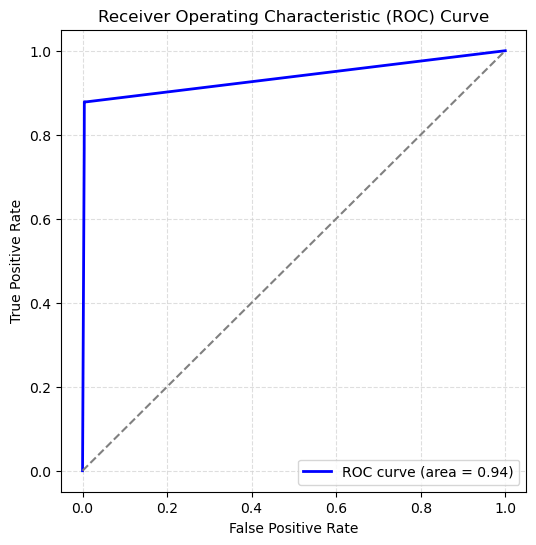

In [22]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

---

TRAIN METRICS
    Confusion Matrix: 
    [[56148   129]
 [   27  1848]]
    
    AUC: 0.9998233452387298

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.93      0.99      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [   79   546]]
    
    AUC: 0.9958888640119409

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    


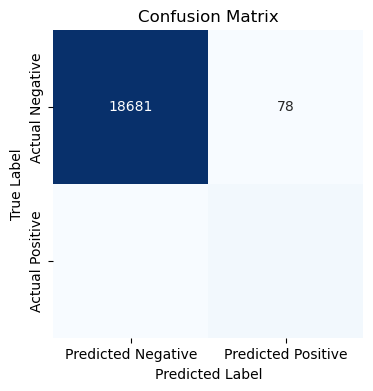

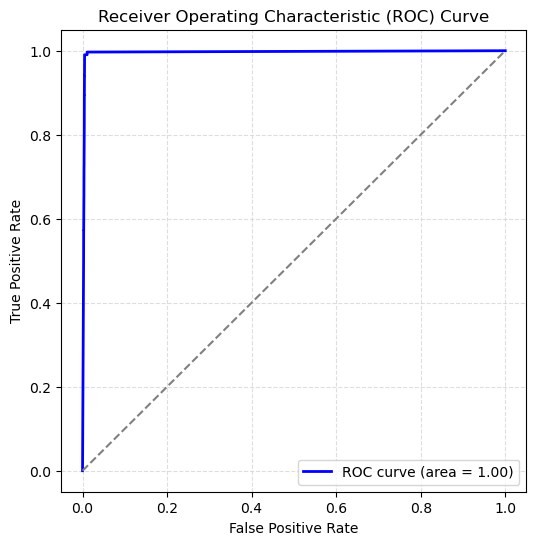

In [23]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55949   328]
 [   12  1863]]
    
    AUC: 0.9957468142698911

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    3   622]]
    
    AUC: 0.9953770670078362

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


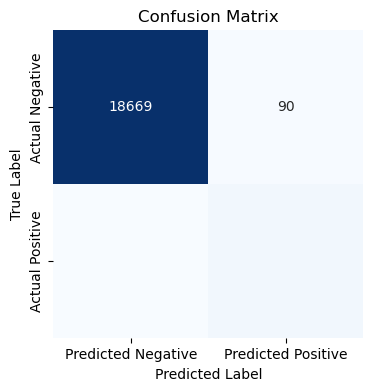

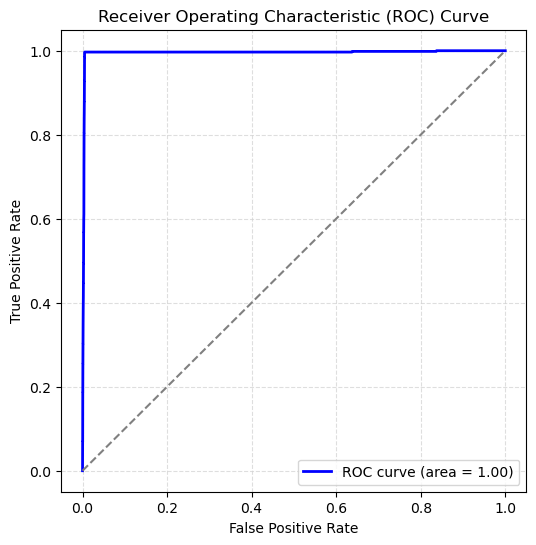

In [24]:
# Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55951   326]
 [   15  1860]]
    
    AUC: 0.9971154776077854

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.9960200010661548

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


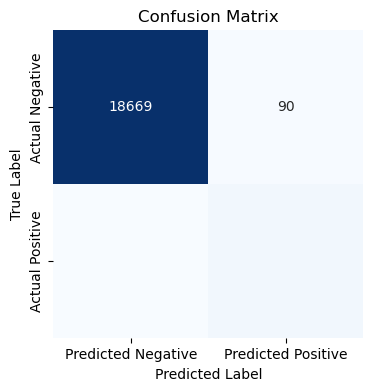

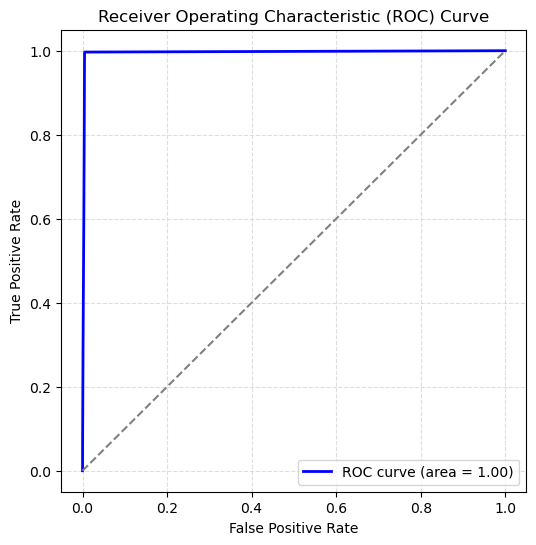

In [25]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [  110   515]]
    
    AUC: 0.961435769497308

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.82      0.85       625

    accuracy                           0.99     19384
   macro avg       0.93      0.91      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    


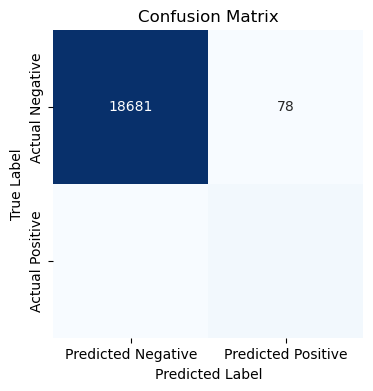

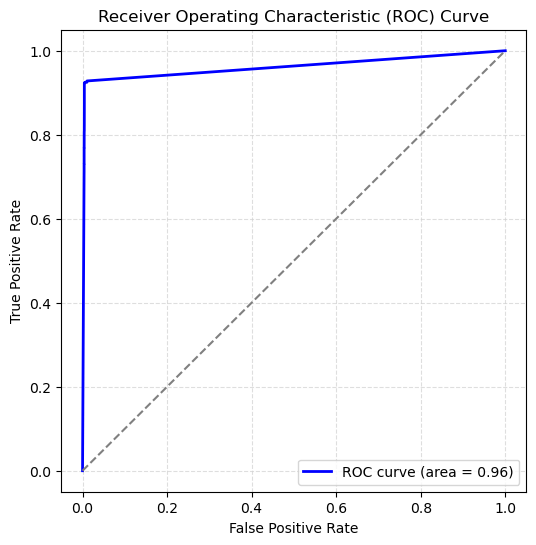

In [26]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55954   323]
 [   15  1860]]
    
    AUC: 0.9970676854369163

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.9964305986459833

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


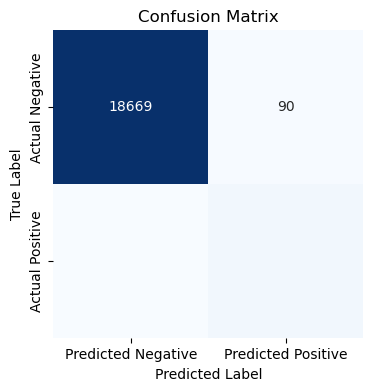

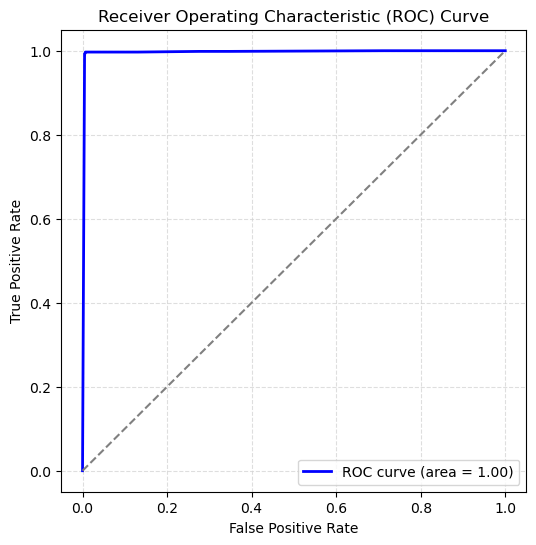

In [27]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55965   312]
 [   10  1865]]
    
    AUC: 0.9983701855701855

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18668    91]
 [    6   619]]
    
    AUC: 0.9952849938696093

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


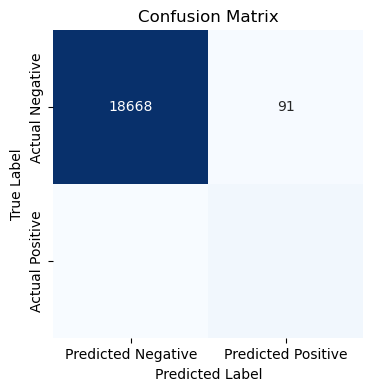

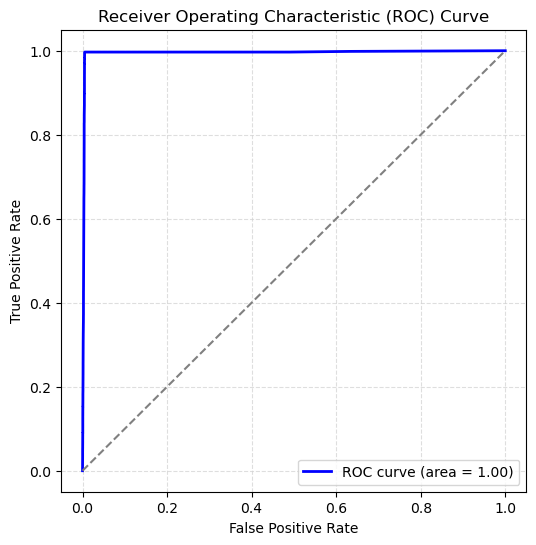

In [28]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [29]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[55954   323]
 [   13  1862]]
    
    AUC: 0.997842699504238

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    4   621]]
    
    AUC: 0.9956511114664961

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


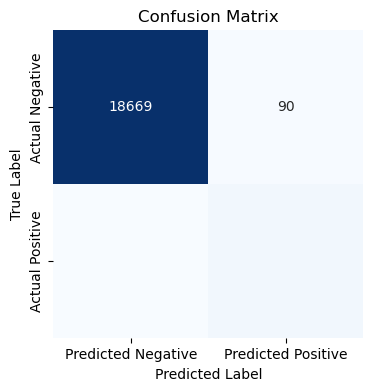

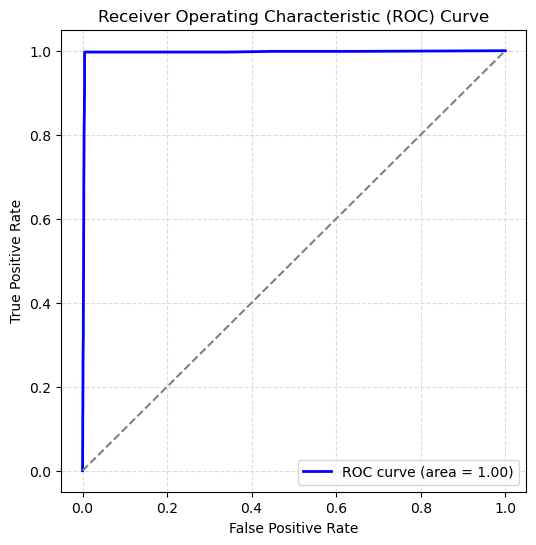

In [30]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55959   318]
 [   16  1859]]
    
    AUC: 0.998193592408977

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    7   618]]
    
    AUC: 0.9959102297563835

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


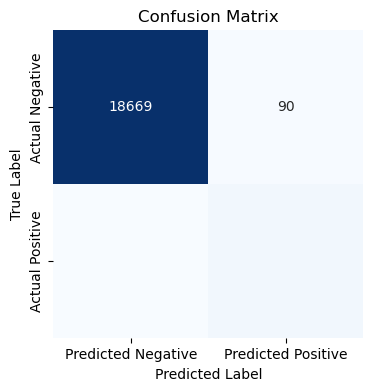

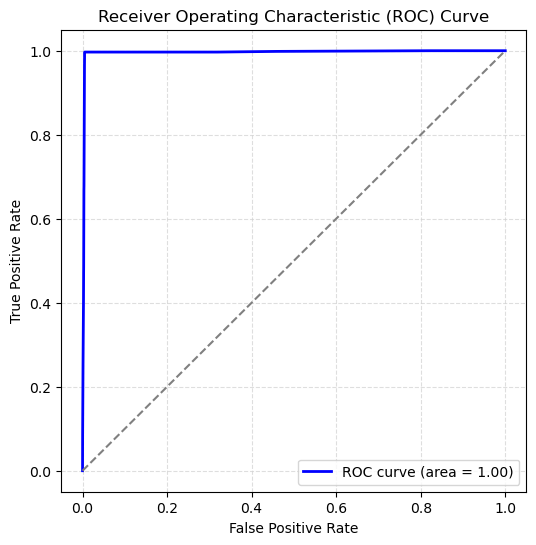

In [31]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)